### 라이브러리 불러오기

In [2]:
# 형태소 분석/텍스트 클리닝
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer, SnowballStemmer
# from nltk.stem.porter import *
# from nltk import word_tokenize
import pandas as pd 
from tqdm import tqdm
from konlpy.tag import Okt
import re

# 단어 추가를 위함
# from ckonlpy.tag import Twitter

# Soynlp 패키지 
from soynlp.noun import LRNounExtractor
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer
from soynlp import DoublespaceLineCorpus
# import urllib.request
# from soynlp.word import WordExtractor


### 데이터 불러오기

In [3]:
df = pd.read_csv('기업데이터(30)_(전처리).csv').iloc[:, 1:]
df.columns = ["com", "date", "duty", "status", "star", "summary", "good", "bad", "expect", "doc"]
df.head()
df1 = df[["com", "date", "duty", "doc"]]

### 불용어, 숫자, 띄어쓰기, 특수문자, 의성어, 이모티콘 Cleaning
- doc -> processing

In [4]:


def clean_text(texts):
    #이모티콘 제거
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)

    #분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
    han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')
    
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', review)# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        # review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        review = re.sub(han, '', review) #remove 특수문자, 의성어
        review = re.sub(emoji_pattern, '', review) #remove 이모티콘
        corpus.append(review)
    return corpus

df1["cleaning"] = clean_text(df1["doc"])

C:\Users\user\AppData\Local\Temp\ipykernel_23556\3389953656.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cleaning"] = clean_text(df1["doc"])


In [20]:
from hanspell import spell_checker
for a in range(len(df1['cleaning'][0:200])):
    result = spell_checker.check(df1['cleaning'][a])
    print(result.original)
    print(result.checked)
    print()
# len(df1['cleaning'])

커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다 회사 시스템에서 비효율적인 부분들이 있고 업무량이 많은 편이다 그냥 간단하게는 더 소통이 잘 되었으면 좋겠다
커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳보다는 있는 편인 것 같다 회사 시스템에서 비효율적인 부분들이 있고 업무량이 많은 편이다 그냥 간단하게는 더 소통이 잘 되었으면 좋겠다

자유로운 복장 분위기가 일단 편해서 좋았어요 물론 업무는 당연히 강도가 있어야 할 부분이지만 그만큼 챙겨 받으니 열심히 일 했습니다 일하기 편한 분위기 좋았네요 저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요 깔끔한 그런 느낌들이 마음에 들었었네요 님으로 부르는 호칭도 좋았습니다 아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고 급여 받으며 일하는 입장에서는 당연히 감당해야 할 몫이라고는 생각하고 일했습니다 저는 계약직으로 년 일했는데 정규직 전환에 대한 기회가 아쉽습니다 딱 년 되니 계약 종료로 업무가 끝나게 되었는데 일에 애정을 가지고 임했던 것만큼 조금 더 나은 기회가 있었으면 좋았겠다 싶네요
자유로운 복장 분위기가 일단 편해서 좋았어요 물론 업무는 당연히 강도가 있어야 할 부분이지만 그만큼 챙겨 받으니 열심히 일했습니다 일하기 편한 분위기 좋았네요 저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요 깔끔한 그런 느낌들이 마음에 들었었네요 님으로 부르는 호칭도 좋았습니다 아무래도 내부 업무에 대한 부담감은 가질 수밖에 없었고 급여 받으며 일하는 입장에서는 당연히 감당해야 할 몫이라고는 생각하고 일했습니다 저는 계약직으로 년 일했는데 정규직 전환에 대한 기회가 아쉽습니다 딱 년 되니 계약 종료로 업무가 끝나게 되었는데 일에 애정을 가지고 임했던 것만큼 조금 더 나은 기회가 있었으면 좋았겠다 싶네요

워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플랫

### soynlp 사용
: 기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점

In [ ]:
# pip install soynlp

### SOYNLP의 tokenizer

In [ ]:
# # 모델이 학습할 데이터 나누기/ 저장
# doc = df1['cleaning'][:45400]
# doc.to_csv('training_file.txt', index=False, header=None, sep="\t")

# # 모델이 학습할 데이터 가져오기
trainSet = DoublespaceLineCorpus("training_file.txt") 
print(len(trainSet))

45400


In [ ]:
# 코드 분석 필요
noun_extractor = LRNounExtractor()
# ??
nouns = noun_extractor.train_extract(list(trainSet)) # list of str like

# ??
word_extractor = WordExtractor(
    min_frequency=50, # example
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)

# ??
word_extractor.train(list(trainSet))
words = word_extractor.extract()

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}

noun_scores = {noun:score.score for noun, score in nouns.items()}
combined_scores = {noun:score + cohesion_score.get(noun, 0)
    for noun, score in noun_scores.items()}
combined_scores.update(
    {subword:cohesion for subword, cohesion in cohesion_score.items()
    if not (subword in combined_scores)}
)

tokenizer = LTokenizer(scores=combined_scores)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (69167, 38956) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 13358 nouns are extracted
training was done. used memory 0.929 Gbory 0.494 Gb
all cohesion probabilities was computed. # words = 15590
all branching entropies was computed # words = 121494
all accessor variety was computed # words = 121494


In [ ]:
# 잘 작동하는지 확인
train_list=list(df1['cleaning'])
print(str(train_list[34]))
print(tokenizer.tokenize(str(train_list[34])))

좋은 인력풀에서 일해볼 수 있는 기회여서 시야를 틀수도 있지만 부바부 전체적으로 자유로운 분위기 이지만 이또한 부바부로 생긴지 오래되지 않은 부서여서 매우 자유로운편이었음 실력일는 팀원이 아닌 리더에게 잘보이는 사람에게 과업을 몰아주는 정치질도 있음 물론 인센티브도 같이 뺏김 오래다니지 않아서 경영진까지 바라고 할게 없었다고 한다
['좋은', '인력', '풀에서', '일해볼', '수', '있는', '기회', '여서', '시야', '를', '틀수도', '있지', '만', '부바', '부', '전체적', '으로', '자유', '로운', '분위기', '이지', '만', '이또', '한', '부바', '부로', '생긴지', '오래', '되지', '않은', '부서', '여서', '매우', '자유', '로운편이었음', '실력', '일는', '팀원', '이', '아닌', '리더', '에게', '잘보', '이는', '사람', '에게', '과업', '을', '몰아주', '는', '정치', '질도', '있음', '물론', '인센티브', '도', '같이', '뺏김', '오래', '다니지', '않아서', '경영진', '까지', '바라', '고', '할게', '없었다', '고', '한다']


In [ ]:
# 빈 컬럼 만들기
df1['tokenize'] = ""

# 빈 컬럼에 토큰화된 결과 추가하기
for num in range(len(df1)):
    df1['tokenize'][num] = tokenizer.tokenize(str(train_list[num]))
    
# 결과 출력
df1.head()


C:\Users\user\AppData\Local\Temp\ipykernel_26560\940875886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tokenize'] = ""
C:\Users\user\AppData\Local\Temp\ipykernel_26560\940875886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tokenize'][num] = tokenizer.tokenize(str(train_list[num]))


com      date    duty                                                doc  \
0  네이버  2022. 11     디자인  커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...   
1  네이버  2022. 11     전문직  자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...   
2  네이버  2022. 11  IT/인터넷  워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...   
3  네이버  2022. 11  IT/인터넷  개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...   
4  네이버  2022. 10  IT/인터넷  아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...   

                                            cleaning  \
0  커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...   
1  자유로운 복장 분위기가 일단 편해서 좋았어요 물론 업무는 당연히 강도가 있어야 할 ...   
2  워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...   
3  개발자가 영향력을 좀 발휘하며 일할수 있는곳 it업계 위 개발에만 집중하며 일할 수...   
4  아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...   

                                            tokenize  
0  [커리어, 경력, 쌓고, 싶은, 사람, 에게, 추천, 수평적, 사무실, 분위기, 와...  
1  [자유, 로운, 복장, 분위기, 가, 일단, 편해서, 좋았어요, 물론, 업무, 는,...  
2  [워라밸, 과, 성장, 을, 동시, 에, 챙길, 수, 있는, 몇, 안되는, 기업, ...  
3  [개발자, 가, 영향력, 을, 좀, 발휘, 하며, 일할수, 있는곳, it, 업계, ...  
4  [아르바이트, 생이었지만, 꿈의, 직장, 이란게, 이런, 것이, 구나, 느낄, 수,...

In [ ]:
# 불용어 사전 불러오기
stopwords = list(pd.read_csv("stopwords_kej.csv")['words'])
# # 불용어 파일이 txt일 경우
# stopwords = list(pd.read_csv("stopword_v2.txt", sep = "\t", encoding = "utf-8")['words'])
stopwords.extend("이")
stopwords = set(stopwords)

# 불용어 제거 함수
def DeleteStopwords(cell):
    words = [word for word in cell if word not in stopwords]
    return words    

# 형태소 분석 적용
tokenizing_doc = []
for cell in tqdm(df1['tokenize']):
    tokenizing_doc.append(DeleteStopwords(cell))
df1['cleaningTokenize'] = tokenizing_doc
df1.head()

100%|██████████| 60573/60573 [00:00<00:00, 111054.73it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_26560\3934074281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaningTokenize'] = tokenizing_doc


com      date    duty                                                doc  \
0  네이버  2022. 11     디자인  커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...   
1  네이버  2022. 11     전문직  자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...   
2  네이버  2022. 11  IT/인터넷  워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...   
3  네이버  2022. 11  IT/인터넷  개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...   
4  네이버  2022. 10  IT/인터넷  아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...   

                                            cleaning  \
0  커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...   
1  자유로운 복장 분위기가 일단 편해서 좋았어요 물론 업무는 당연히 강도가 있어야 할 ...   
2  워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...   
3  개발자가 영향력을 좀 발휘하며 일할수 있는곳 it업계 위 개발에만 집중하며 일할 수...   
4  아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...   

                                            tokenize  \
0  [커리어, 경력, 쌓고, 싶은, 사람, 에게, 추천, 수평적, 사무실, 분위기, 와...   
1  [자유, 로운, 복장, 분위기, 가, 일단, 편해서, 좋았어요, 물론, 업무, 는,...   
2  [워라밸, 과, 성장, 을, 동시, 에, 챙길, 수, 있는, 몇, 안되는, 기업, ...   
3  [개발자, 가, 영향력, 을, 좀, 발휘, 하며, 일할수, 있는곳, it, 업계, ...   
4  [아르바이트, 생이었지만, 꿈의, 직장, 이란게, 이런, 것이, 구나, 느낄, 수,...   

                                    cleaningTokenize  
0  [커리어, 경력, 쌓고, 싶은, 사람, 추천, 수평적, 사무실, 분위기, 복지, 편...  
1  [자유, 로운, 복장, 분위기, 편해서, 좋았어요, 업무, 당연, 히, 강도, 있어...  
2  [워라밸, 성장, 동시, 챙길, 수, 안되는, 기업, 앞으로, 도, 가장, 전망, ...  
3  [개발자, 영향력, 발휘, 하며, 일할수, 있는곳, it, 업계, 위, 개발, 에만...  
4  [아르바이트, 생이었지만, 꿈의, 직장, 이란게, 것이, 구나, 느낄, 수, 있었다...

In [ ]:
# # ★★★★ stopwords 업데이트 꼭 하기~ ★★★★
# save_stopwords = pd.DataFrame(stopwords, columns=["words"])
# print(save_stopwords.head(2))
# save_stopwords.to_csv("stopwords_kej.csv", encoding='utf-8-sig', index=False)

  words
0    있는
1    소생


In [ ]:
# 파일 저장
df1.to_csv('불용어처리 결과.csv', encoding='utf-8-sig', index=False)

#### TF-IDF

In [ ]:
data1 = df1['cleaningTokenize'].tolist() #시리즈에서 리스트로

data3 = []
for i in data1:
    string = i[0]  
    for w in i[1:]:  #첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " "  #단어 사이는 띄어쓰기로 연결
        string += w  #띄어쓰기 이후 다음 단어 써주기 반법
    data3.append(string)
data3[0]


'커리어 경력 쌓고 싶은 사람 추천 수평적 사무실 분위기 복지 편인 같다 회사 시스템 비효율적 부분들 업무 많은 그냥 간단 소통이 잘 되었으면 좋겠다'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import matplotlib.pyplot as plt

from collections import defaultdict
from gensim import corpora, models
from gensim.models import CoherenceModel


In [ ]:
# 벡터화하기 위한 모델 vectorizer
vectorizer = TfidfVectorizer()
# 사이킷런의 CountVectorizer와 TfidfVectorizer는 텍스트를 피처단위로 벡터화해서 변환시킴
# CSR(Compressed Sparse Row)형태의 희소행렬로 만든다.  
sp_matrix = vectorizer.fit_transform(data3)

In [ ]:
word2id = defaultdict(lambda: 0) # value 없는 key인 경우 에러 대신 0 출력

In [ ]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf = []
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i,word2id[token]])for token in sent.split()])

#### 토픽 개수 정하기

In [ ]:
dictionary = corpora.Dictionary(data1)
dictionary

In [ ]:
# 튜플로 mapping해주는 함수, doc2bow
corpus = [dictionary.doc2bow(text) for text in data1]

In [ ]:
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)]]

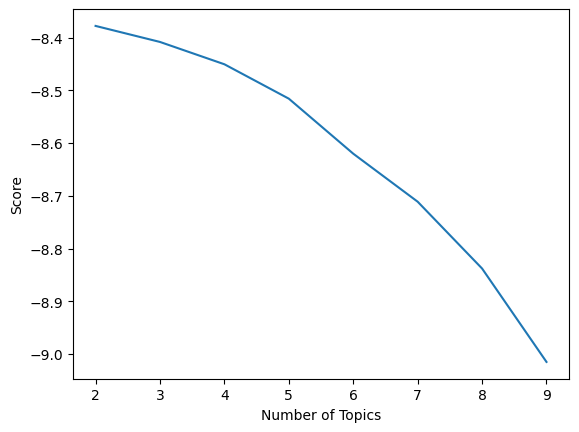

In [ ]:
# coherence확인(군집평가)

values = [] 
coherence_values = []

for i in range(2, 10):
    ldamodel = models.ldamodel.LdaModel(corpus,
                                        num_topics=i,
                                        id2word=dictionary)


    values.append(ldamodel.log_perplexity(corpus))
    
x = range(2,10) 
plt.plot(x, values) 
plt.xlabel('Number of Topics') 
plt.ylabel('Score')
plt.show()


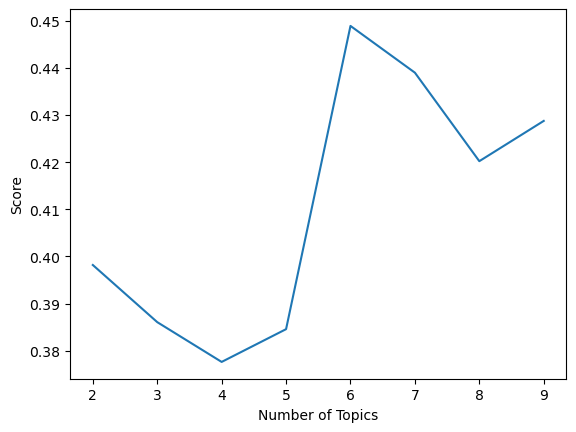

In [ ]:
# coherence확인(군집평가)
values = [] 
coherence_values = []

for i in range(2, 10):
    ldamodel = models.ldamodel.LdaModel(corpus,
                                        num_topics=i,
                                        id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model = ldamodel,
                                    texts = data1,
                                    dictionary = dictionary,
                                    topn = 10)
    
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,10) 
plt.plot(x, coherence_values) 
plt.xlabel('Number of Topics') 
plt.ylabel('Score')
plt.show()


### ward clustering :  데이터의 수직적 구조를 파악할 수 있음

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [ ]:
sp_matrix1 = vectorizer.fit_transform(data3)

In [ ]:
sp_matrix1

<60573x150298 sparse matrix of type '<class 'numpy.float64'>'
	with 3014442 stored elements in Compressed Sparse Row format>

In [ ]:
df1 = pd.DataFrame(sp_matrix1.toarray(), columns = vectorizer.get_feature_names())

MemoryError: Unable to allocate 67.8 GiB for an array with shape (60573, 150298) and data type float64

In [ ]:
cluster = AgglomerativeClustering(n_clusters = 6,
                                  linkage = 'ward')
cluster

AgglomerativeClustering(n_clusters=6)

In [ ]:
result = cluster.fit_predict(df1)
result

array([0, 4, 4, 0, 0, 4, 0, 0, 4, 2, 0, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 0, 3, 1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 3, 0, 4, 4, 4, 0, 4, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4,
       0, 4, 0, 4, 0, 0, 0, 4, 1, 4, 0, 0, 1, 0, 4, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 5, 4, 4, 1, 0, 0, 4, 0, 2, 0, 2, 4,
       0, 0, 1, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 1, 0, 4, 0, 1, 0, 0, 1, 0,
       0, 0, 5, 3, 4, 0, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 1, 4, 0,
       1, 1, 0, 4, 0, 0, 4, 1, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 5, 1,
       0, 1, 1, 4, 4, 2, 2, 0, 0, 4, 0, 0, 0, 4, 1, 0, 0, 4, 0, 0, 1, 0,
       4, 1, 1, 0, 0, 4, 1, 4, 1, 4, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 4, 1, 0, 0, 2, 0, 1, 0, 4, 4, 0, 0, 0, 1, 4, 4, 4, 4, 0, 1, 0,
       1, 0, 5, 4, 0, 4, 5, 0, 3, 0, 1, 4, 0, 5, 1,

In [ ]:
df_ward = data.copy()

In [ ]:
df_ward['Cluster'] = list(result)
df_ward

time                                             review  \
0      2022. 6. 9. 0:24          생활     나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...   
1    2022. 2. 11. 23:53          일지     4일차_ 맛있으면 안되는데..?       키메랩   ・...   
2     2022. 2. 22. 0:44          맛집멋집     교대역 한 끼 식사 비건푸드 스윗밸런스        ...   
3    2022. 2. 14. 10:00             맘메이크선식     바쁜직장인들을 위한 추천 간편식사대용식,  ...   
4    2021. 9. 20. 17:56   ﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...   
..                  ...                                                ...   
943   2021. 5. 6. 17:17             빵만먹고살고싶다     [마켓컬리빵]비건베이커리로 유명한 연남동...   
944   2022. 4. 4. 23:02             일상     다이어트 식단기록 76 / 77일차       O리...   
945  2022. 4. 26. 17:10          ♧계란아 뭐하니?♧     널담 병아리콩 스낵<비건 푸드>      ...   
946   2021. 3. 6. 17:05          카페     거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집   ...   
947   2021. 8. 5. 10:10             DIET     100일 다이어트 챌린지 6월 2주       ...   

    comment like                                                url  \
0        []    1       https://blog.naver.com/leeahn01/222765307737   
1        []   49       https://blog.naver.com/bella_hw/222645313869   
2        []    2  https://blog.naver.com/naughtypuppy22/22265413...   
3        []    2        https://blog.naver.com/mom_say/222646546514   
4        []    5   https://blog.naver.com/givingtreems/222511615680   
..      ...  ...                                                ...   
943      []   []      https://blog.naver.com/jimin5077/222340294244   
944      []   10       https://blog.naver.com/sj330035/222691733289   
945      []   19        https://blog.naver.com/aablack/222712249314   
946      []    8   https://blog.naver.com/h_yuri931017/222266408609   
947      []    3     https://blog.naver.com/jiiina1991/222456905138   

                                                   doc  \
0     생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안  위...   
1     일지 일차 맛있으면 안되는데 키메랩 복사 이웃추가 본문 기타 기능 공유하기 생각보...   
2     맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피  위치스윗밸런스 교대역...   
3     맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...   
4     베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...   
..                                                 ...   
943   빵만먹고살고싶다 마켓컬리빵 비건베이커리로 유명한 연남동 빵어니스타 마켓컬리 주문 ...   
944   일상 다이어트 식단기록 일차 리 복사 이웃추가 본문 기타 기능 공유하기 다이어트 ...   
945   계란아 뭐하니 널담 병아리콩 스낵 비건 푸드 힘찬 가족 복사 이웃추가 본문 기타 ...   
946   카페 거제카페추천 프릴메이 아주동카페 비건빵집 율로그  위치프릴메이 프릴메이 더보...   
947   일 다이어트 챌린지 월 주 복사 이웃추가 본문 기타 기능 공유하기 어느덧 을 달려...   

                                                 token  \
0    [생활, 나, 결혼식, 답례, 품, 후기, 및, 추천, 꾸다, 프리미엄, 비건, 쿠...   
1    [일지, 일차, 맛있다, 안되다, 키메, 랩, 복사, 이웃, 추가, 본문, 기타, ...   
2    [맛집, 멋지다, 교대역, 하다, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우,...   
3    [맘, 메이크, 선, 바쁘다, 직장인, 위, 추천, 간편식, 대용, 포만, 감, 비...   
4    [베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 새다, 리, 등, 가지,...   
..                                                 ...   
943  [빵, 먹고살다, 마켓, 컬리, 빵, 비건, 베이커리, 유명하다, 연남동, 빵, 스...   
944  [일상, 다이어트, 식단, 기록, 일차, 리, 복사, 이웃, 추가, 본문, 기타, ...   
945  [계란, 뭐, 하다, 널다, 병아리, 콩, 스낵, 비건, 푸드, 힘차다, 가족, 복...   
946  [카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...   
947  [일, 다이어트, 채다, 린지, 월, 주, 복사, 이웃, 추가, 본문, 기타, 기능...   

                                             text_noun  Cluster  
0    [생활, 나, 결혼식, 답례, 품, 후기, 및, 추천, 프리미엄, 비건, 쿠키, 디...        0  
1    [일지, 일차, 키메, 랩, 복사, 이웃, 추가, 본문, 기타, 기능, 공유, 생각...        4  
2    [맛집, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, 퍼피, 위...        4  
3    [맘, 메이크, 선, 직장인, 위, 추천, 간편식, 대용, 포만, 감, 비타민, 내...        0  
4    [베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 리, 등, 가지, 채소,...        0  
..                                                 ...      ...  
943  [빵, 마켓, 컬리, 빵, 비건, 베이커리, 연남동, 빵, 스타, 마켓, 컬리, 주...        1  
944  [일상, 다이어트, 식단, 기록, 일차, 리, 복사, 이웃, 추가, 본문, 기타, ...        1  
945  [계란, 뭐, 병아리, 콩, 스낵, 비건, 푸드, 가족, 복사, 이웃, 추가, 본문...        0  
946  [카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...        0  
947  [일, 다이어트, 린지, 월, 주, 복사, 이웃, 추가, 본문, 기타, 기능, 공유...        0  

[948 rows x 9 columns]

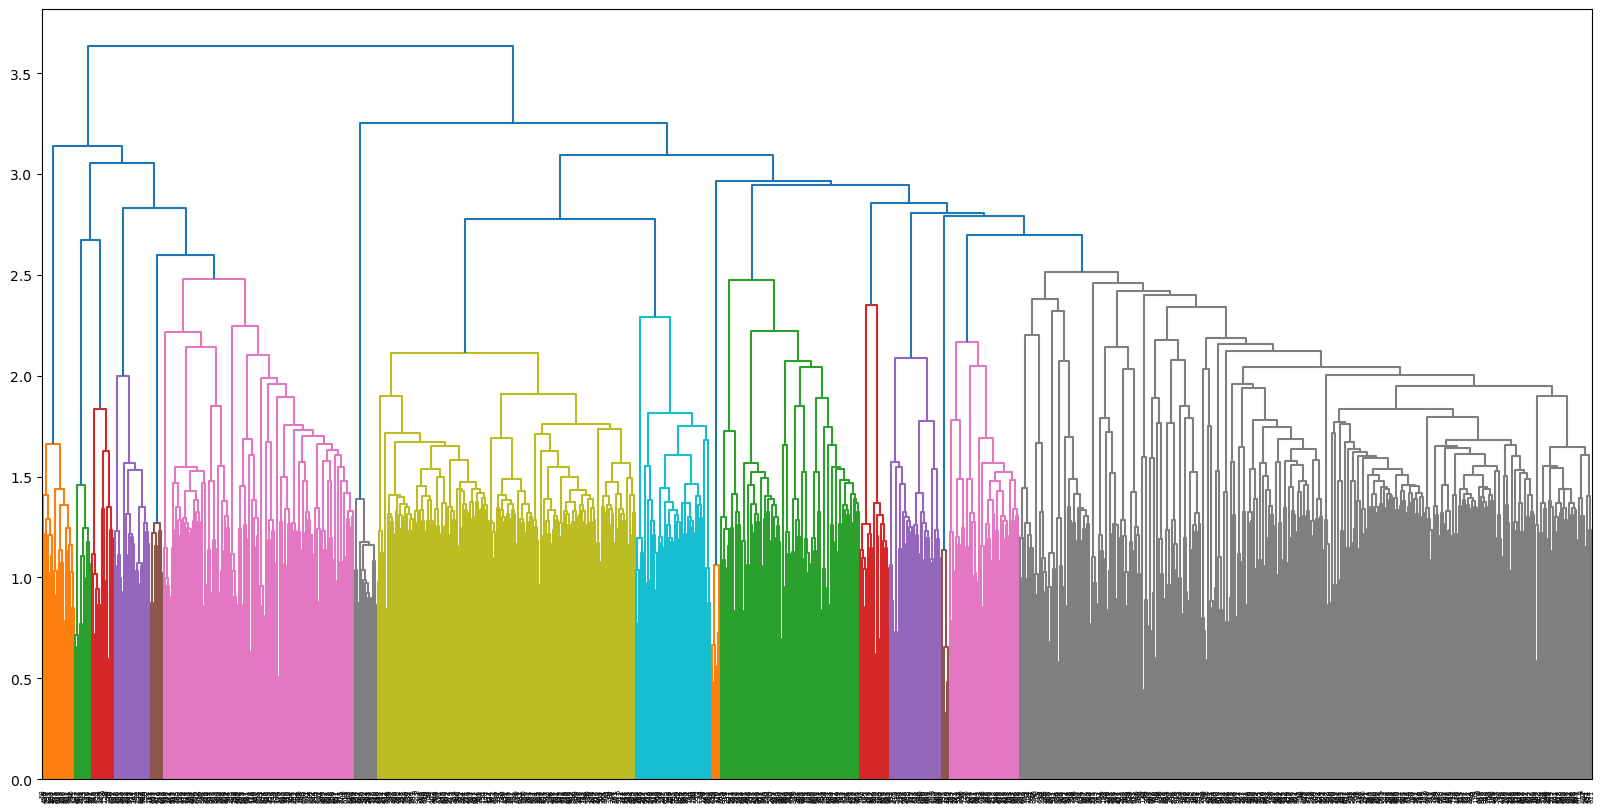

In [ ]:
plt.figure(figsize=(20,10))
dendrogram = shc.dendrogram(shc.linkage(df1, method='ward'))


In [ ]:
import pickle
df_ward.to_pickle('직장인탐구생활_clustering.pkl')

df_ward.to_csv('직장인탐구생활_clustering.csv', encoding = 'utf-8-sig')

### LDA

In [ ]:
# 모든 모듈을 불러 옴(LDA 기본 셋팅값)
from modules수업용 import *

# #!/usr/bin/env python
# # coding: utf-8

# import pandas as pd
# from konlpy.tag import Okt #형태소 분석
# from nltk import bigrams
# from nltk.util import ngrams
# import pandas as pd

# from gensim.models.ldamodel import LdaModel # LDA 분석
# import matplotlib.pyplot as plt
# from gensim.models.coherencemodel import CoherenceModel # 토픽갯수를 검증하기 위함
# from tqdm.notebook import tqdm
# from gensim import corpora
# from gensim.models import TfidfModel

# import warnings
# warnings.filterwarnings(action='ignore')

# okt=Okt()

# # #원하는 태그 추출 & 불용어 제거
# # def okt_pos_tagging(string):
    
# #     #불용어
# #     stopwords = pd.read_csv('ko-stopwords.csv')
# #     stopwords=list(stopwords['stopwords'])
# #     stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
# #                       "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
# #                       "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다",
# #                      "너무", "먹다"])
# #     stopwords=set(stopwords)    
# #     pos_words = okt.pos(string, stem=True, norm=True)
# #     words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb'] if word not in stopwords ]
# #     return words


# #bigram 만드는 함수
# def bigram_(tokens):
    
#     #document 별 형태소분석기로 분리된 토큰들을 bigram으로 변환(토큰은 string 상태)
#     bigram_stack = [] #변환된 bigram
#     for token in tokens:
#         bigram = bigrams(token)
#         bigram_token = [' '.join(grams) for grams in bigram]
#         bigram_stack.append(bigram_token)
        
        
#     #bigram  딕셔너리 생성(아이디 매칭)
#     id2word = corpora.Dictionary(bigram_stack) #unigram
# #     id2word.token2id  #아이디가 매칭된 딕셔너리 확인용
        
    
    
#     #딕셔너리에 매칭한 corpus 생성
#     #생성한 bigram 딕셔너리에서 bigram_stack의 토큰을 아이디로 매칭변환
#     texts = bigram_stack 
#     corpus = [id2word.doc2bow(text) for text in texts]
    
    
#     #gensim으로 tf-idf 처리 #바이그램 요소 하나를 하나의 워드로 처리해서 tf_idf 점수
#     tfidf = TfidfModel(corpus) 
#     corpus_tfidf = tfidf[corpus]
#     tfidf_corpus = [x for x in corpus_tfidf]
#     return tfidf_corpus, corpus ,id2word




# #perplexcity 계산(그래프 생성, 테이블 생성)
# def perplexcity_graph(topic_n, bigram_result):
#     #topic_n _ 몇개 토픽을 테스트 해볼것인지 지정    
#     #perplexcity
#     perplexity_value = []
#     num_t = []
#     for i in topic_n:
#         model = LdaModel(bigram_result[0], num_topics = i, id2word=bigram_result[2])
#         num_t.append(i)
#         perplexity_value.append(model.log_perplexity(bigram_result[1]))

#     #그래프
#     plt.title('Perpelxity score')
#     plt.plot(topic_n, perplexity_value)
#     plt.xlabel('number of topics')
#     plt.ylabel('perplexity_scores')
#     plt.show
#     plt.savefig('Perplexity_Graph.png')  #그래프저장
    
    
#     #테이블 저장
#     perplexity_df = pd.DataFrame(list(zip(num_t,perplexity_value)), columns = ['cluster','perplexity_score'])
#     perplexity_df.to_csv('Perplexity_score_table.csv', encoding='utf-8-sig')
#     perplexity_df
    
    
    
    
    
# #coherence 계산(그래프 생성, 테이블 생성)    
# def coherence_graph(topic_n, bigram_result):
#     coherence_value = []
#     num_t = []

#     for i in topic_n:
#         model = LdaModel(bigram_result[0], num_topics = i, id2word=bigram_result[2])
#         cm = CoherenceModel(model=model, corpus=bigram_result[1], coherence='u_mass')
#         coherence = cm.get_coherence()
#         coherence_value.append(coherence)
#         num_t.append(i)

#     #그래프
#     plt.title('Coherence score')
#     plt.plot(topic_n, coherence_value)
#     plt.xlabel('number of topics')
#     plt.ylabel('coherence_scores')
#     plt.show
#     plt.savefig('Coherence_Graph.png')  #그래프저장

    
#     #테이블 저장
#     coherence_df = pd.DataFrame(list(zip(num_t,coherence_value)), columns = ['cluster','coherence_score'])
#     coherence_df.to_csv('Coherence_score_table.csv', encoding='utf-8-sig')
#     coherence_df
    
    
    
    
    
    
    
    
# #doc 문서별 토픽 추출하기
# def exctract_topic(ldamodel, corpus):
#     topic_n = []
#     topic_prop = []
#     all_topic_prop = []
#     for topic_doc in ldamodel[corpus]:
#         topic_doc = sorted(topic_doc, key=lambda x: (x[1]), reverse=True) #여러 토픽이 할당되어 있는경우 높은 확률의 토픽순으로 정렬
        
#         #확률 기준대로 정렬 했으므로 topic_doc[0] 제일 높은 확률의 토픽
#         topic_n.append(int(topic_doc[0][0]))
#         topic_prop.append(round(topic_doc[0][1],4))
#         all_topic_prop.append(topic_doc)
        
#     #데이터프레임화    
#     data = {'topic':topic_n, 'topic_weight' : topic_prop ,'topic_all_weight': all_topic_prop}
#     df = pd.DataFrame(data)
#     return df

In [ ]:
# bigram을 적용하여 tf-idf기준으로 토큰과 맴핑
# 데이터프레임 형태의 토큰화된 단어들을 bigram형태로 변화하기 위한 작엄

texts = df1['cleaningTokenize']
bigram_result = bigram_(texts)

In [ ]:
bigram_result[:3]

([[(0, 0.28959789949222936),
   (1, 0.18834156983264363),
   (2, 0.16261644889354518),
   (3, 0.28959789949222936),
   (4, 0.15361759793998225),
   (5, 0.28959789949222936),
   (6, 0.28959789949222936),
   (7, 0.26070512457107003),
   (8, 0.1527359733615806),
   (9, 0.24727074929266793),
   (10, 0.14325470150389683),
   (11, 0.13724548178427462),
   (12, 0.16955856776605688),
   (13, 0.14835367955196888),
   (14, 0.2318123496499107),
   (15, 0.13584043531633774),
   (16, 0.177865290956634),
   (17, 0.15361759793998225),
   (18, 0.18420769318443136),
   (19, 0.20713648013447997),
   (20, 0.24727074929266793),
   (21, 0.21216110621069656),
   (22, 0.1613834416635655)],
  [(23, 0.12020107283849371),
   (24, 0.10064248717390427),
   (25, 0.12020107283849371),
   (26, 0.12020107283849371),
   (27, 0.0813914107034128),
   (28, 0.12020107283849371),
   (29, 0.09750219152884262),
   (30, 0.088060005358608),
   (31, 0.09621648904908219),
   (32, 0.08696750888717118),
   (33, 0.09895980078187694

#### **3.LDA토픽의 갯수 테스트**
- perplexcity scroe 와 coherence scroe
    - 적절한 elbow point와 클러스터링된 원문을 보고 적절한 토픽 갯수를 선정함
    - check_topic_n변수에 테스트해볼 토픽의 갯수를 입력
    - 이때 토픽의 갯수는 range를 사용하여 입력

In [ ]:
# 테스트 할 토픽의 갯수 입력, range(사이 숫자 입력)

check_topic_n = range(3,11) # 토픽의 갯수를 3~11개까지 추출하겠음

####  **[perplexcity score]**
- 군집의 복잡도를 의미함. 낮을수록 좋다고 평가함.

0it [00:00, ?it/s]

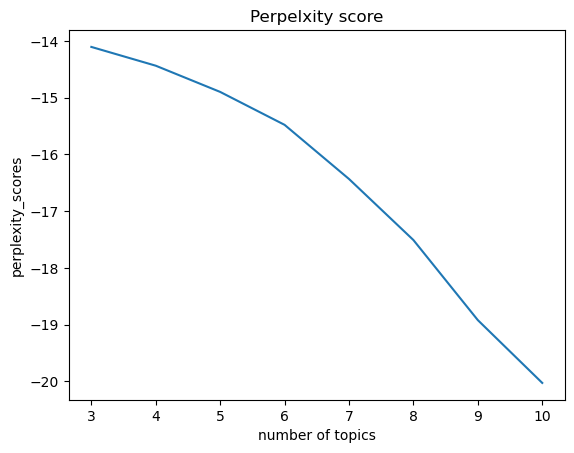

In [ ]:
# 토픽의 갯수에 따라 달라지는 perplexcity점수를 보여줌
# 해당 그래프는 PNG형태로 저장됨
# 해당 그래프를 수치로 보여주는 table이 csv로 저장됨
from tqdm import tqdm
tqdm(perplexcity_graph(check_topic_n, bigram_result))

#### **[coherence score]**
- 군집의 일관성을 의미하여 높을수록 좋다고 평가한다.
- perplexcity와 coherence 점수가 완벽한 정답은 아니기에 결과를 보고 추가적으로 판단을 할 필요가 있음
- 토픽의 갯수에 따라 달라지는 coherence점수
- 꺽이는 지점에서 우선적으로 파악하는 것이 좋고.
- 일반도가 낮아지다가 상승한 부분은 군집화가 잘 되었다고 본다.
- 잘 나눠진 부분을 원문 볼 때 우선적으로 보면 좋음

#### **4.LDA시각화 라이브러리 확인**
- pyLDavis라이브러리를 활용해 LDA를 시각화 한다.
- 해당 라이브러리가 잘 작동하는지 확인하고 토픽별 할당괸 documents를 확인한다.

##### 4.1.시각화에 필요한 라이브러리 실행 및 설치
- pyLDAvix라이브러리가 없을 경우, pip install pyldavis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

c:\Users\user\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


##### 4.2.라이브러리 테스트

In [ ]:
len(bigram_result)

3

In [ ]:
# lda시각화가 잘 실행되는지 확인
# 해당코드에서 오류나면 라이브러리가 제대로 설치되었는지 확인 필요
model = LdaModel(bigram_result[0], num_topics=5, id2word=bigram_result[2])
visual = gensimvis.prepare(model, bigram_result[1], bigram_result[2])
pyLDAvis.display(visual)